In [1]:
import re
import os
import csv

c=[]
b=["ip","timestamp","timezone","request","slash","http","status"]

with open ("/content/drive/MyDrive/something.txt") as f:
  lines = f.read().splitlines()
  
  for line in lines:
      
      line=line.replace(",","")
      line=line.replace("[","")
      line=line.replace("]","")
      line=line.replace('"','')
      line=line.replace('-','')
      a=re.split('\s+', line)[:7]

      c.append(a)
print(c)

with open('/content/drive/MyDrive/some.csv', 'w') as f: 
      
    # using csv.writer method from CSV package 
    write = csv.writer(f) 
      
    write.writerow(b) 
    write.writerows(c) 


[['103.44.12.218', '19/Mar/2021:14:27:44', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:44', '+0000', 'GET', '/exam/login/?next=/exam/167/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:44', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/169/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/164/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/165/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/163/check/1/6/16/16/', 'HTTP/1.1', '200'], [

In [2]:




import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/some.csv")

In [3]:
data

ip             timestamp  ...      http status
0     103.44.12.218  19/Mar/2021:14:27:44  ...  HTTP/1.1  200.0
1     103.44.12.218  19/Mar/2021:14:27:44  ...  HTTP/1.1  200.0
2     103.44.12.218  19/Mar/2021:14:27:44  ...  HTTP/1.1  200.0
3     103.44.12.218  19/Mar/2021:14:27:45  ...  HTTP/1.1  200.0
4     103.44.12.218  19/Mar/2021:14:27:45  ...  HTTP/1.1  200.0
...             ...                   ...  ...       ...    ...
5178  103.44.12.218  19/Mar/2021:17:23:49  ...  HTTP/1.1  302.0
5179  103.44.12.218  19/Mar/2021:17:23:49  ...  HTTP/1.1  200.0
5180  103.44.12.218  19/Mar/2021:17:23:49  ...  HTTP/1.1  200.0
5181  103.44.12.218  19/Mar/2021:17:24:17  ...  HTTP/1.1  200.0
5182  103.44.12.218  19/Mar/2021:17:24:47  ...  HTTP/1.1  200.0

[5183 rows x 7 columns]

In [4]:
data.isnull().sum()

ip           0
timestamp    0
timezone     0
request      0
slash        0
http         9
status       9
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
#data.dropna(axis=1,inplace=True)

In [7]:


data.isnull().sum()


ip           0
timestamp    0
timezone     0
request      0
slash        0
http         0
status       0
dtype: int64

In [8]:
data['status'] = data['status'].astype(int)
data['status']

0       200
1       200
2       200
3       200
4       200
       ... 
5178    302
5179    200
5180    200
5181    200
5182    200
Name: status, Length: 5174, dtype: int64

In [9]:
data

ip             timestamp  ...      http status
0     103.44.12.218  19/Mar/2021:14:27:44  ...  HTTP/1.1    200
1     103.44.12.218  19/Mar/2021:14:27:44  ...  HTTP/1.1    200
2     103.44.12.218  19/Mar/2021:14:27:44  ...  HTTP/1.1    200
3     103.44.12.218  19/Mar/2021:14:27:45  ...  HTTP/1.1    200
4     103.44.12.218  19/Mar/2021:14:27:45  ...  HTTP/1.1    200
...             ...                   ...  ...       ...    ...
5178  103.44.12.218  19/Mar/2021:17:23:49  ...  HTTP/1.1    302
5179  103.44.12.218  19/Mar/2021:17:23:49  ...  HTTP/1.1    200
5180  103.44.12.218  19/Mar/2021:17:23:49  ...  HTTP/1.1    200
5181  103.44.12.218  19/Mar/2021:17:24:17  ...  HTTP/1.1    200
5182  103.44.12.218  19/Mar/2021:17:24:47  ...  HTTP/1.1    200

[5174 rows x 7 columns]

In [10]:
pd.concat([data['status'].value_counts().rename('count'), 
        data['status'].value_counts(normalize=True).mul(100).rename('percentage')], axis=1)

count  percentage
200   3724   71.975261
404    534   10.320835
403    450    8.697333
302    243    4.696560
500    175    3.382296
499     42    0.811751
182      2    0.038655
400      2    0.038655
405      1    0.019327
301      1    0.019327

In [11]:
!pip install sidetable
import sidetable

In [12]:
data.stb.freq(['status'],style=True)

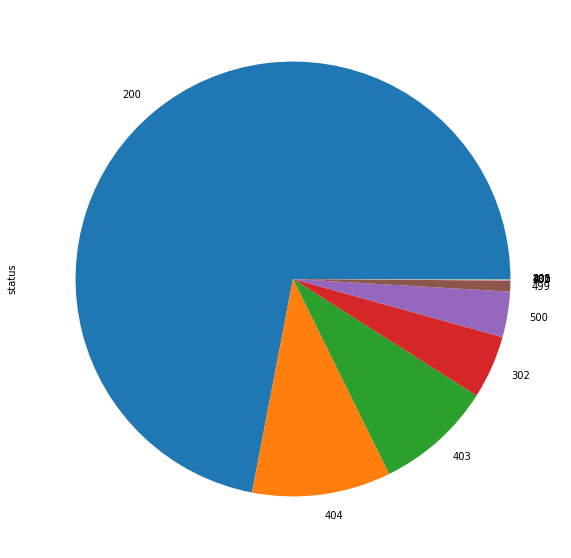

In [13]:
data.status.value_counts().plot.pie(figsize=(10,10))

In [14]:
from datetime import datetime

In [15]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%b/%Y:%H:%M:%S')

In [16]:
data['timestamp']

0      2021-03-19 14:27:44
1      2021-03-19 14:27:44
2      2021-03-19 14:27:44
3      2021-03-19 14:27:45
4      2021-03-19 14:27:45
               ...        
5178   2021-03-19 17:23:49
5179   2021-03-19 17:23:49
5180   2021-03-19 17:23:49
5181   2021-03-19 17:24:17
5182   2021-03-19 17:24:47
Name: timestamp, Length: 5174, dtype: datetime64[ns]

In [17]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute
data['second'] = data['timestamp'].dt.second

In [18]:
data

ip           timestamp  timezone  ... hour minute second
0     103.44.12.218 2021-03-19 14:27:44         0  ...   14     27     44
1     103.44.12.218 2021-03-19 14:27:44         0  ...   14     27     44
2     103.44.12.218 2021-03-19 14:27:44         0  ...   14     27     44
3     103.44.12.218 2021-03-19 14:27:45         0  ...   14     27     45
4     103.44.12.218 2021-03-19 14:27:45         0  ...   14     27     45
...             ...                 ...       ...  ...  ...    ...    ...
5178  103.44.12.218 2021-03-19 17:23:49         0  ...   17     23     49
5179  103.44.12.218 2021-03-19 17:23:49         0  ...   17     23     49
5180  103.44.12.218 2021-03-19 17:23:49         0  ...   17     23     49
5181  103.44.12.218 2021-03-19 17:24:17         0  ...   17     24     17
5182  103.44.12.218 2021-03-19 17:24:47         0  ...   17     24     47

[5174 rows x 13 columns]

In [19]:
(data.groupby(["request"]).agg({'hour': ['max']}).stb.subtotal())

hour
                                                    max
request                                                
GET                                                  17
HEAD                                                 17
OPTIONS                                              15
POST                                                 17
\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie:        15
\x16\x03\x01\x00M\x01\x00\x00I\x03\x03B#T\xB8'\...   15
\xBA\xABd\xA1EZC\xDBM\x87\xEE^\xFD\xBF\x159          16
grand_total                                         112

MAX REUESTS=112


In [20]:
(data.groupby(["request"]).agg({'hour': ['min']}).stb.subtotal())

hour
                                                    min
request                                                
GET                                                  14
HEAD                                                 14
OPTIONS                                              15
POST                                                 14
\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie:        15
\x16\x03\x01\x00M\x01\x00\x00I\x03\x03B#T\xB8'\...   15
\xBA\xABd\xA1EZC\xDBM\x87\xEE^\xFD\xBF\x159          16
grand_total                                         103

minimum Requests=103

In [21]:
data.groupby(["request"]).agg({'hour': ['mean']}).stb.subtotal()

hour
                                                          mean
request                                                       
GET                                                  15.287162
HEAD                                                 15.436620
OPTIONS                                              15.000000
POST                                                 14.928081
\x03\x00\x00/*\xE0\x00\x00\x00\x00\x00Cookie:        15.000000
\x16\x03\x01\x00M\x01\x00\x00I\x03\x03B#T\xB8'\...   15.000000
\xBA\xABd\xA1EZC\xDBM\x87\xEE^\xFD\xBF\x159          16.000000
grand_total                                         106.651863

In [22]:
import re

In [23]:
c=[]
b=["ip","timestamp","timezone","request","slash","http","status"]

with open ("/content/drive/MyDrive/something.txt") as f:
  lines = f.read().splitlines()
  
  for line in lines:
      
      line=line.replace(",","")
      line=line.replace("[","")
      line=line.replace("]","")
      line=line.replace('"','')
      line=line.replace('-','')
      a=re.split('\s+', line)[:7]

      c.append(a)
print(c)

[['103.44.12.218', '19/Mar/2021:14:27:44', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:44', '+0000', 'GET', '/exam/login/?next=/exam/167/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:44', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/169/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/164/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/165/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/168/check/1/6/16/16/', 'HTTP/1.1', '200'], ['103.44.12.218', '19/Mar/2021:14:27:45', '+0000', 'POST', '/exam/163/check/1/6/16/16/', 'HTTP/1.1', '200'], [

In [24]:
print(type(c))

<class 'list'>


In [25]:
flattened = [] 
for sublist in c: 
  a=dict(zip(b,sublist))
  flattened.append(a)

flattened

[{'http': 'HTTP/1.1',
  'ip': '103.44.12.218',
  'request': 'POST',
  'slash': '/exam/168/check/1/6/16/16/',
  'status': '200',
  'timestamp': '19/Mar/2021:14:27:44',
  'timezone': '+0000'},
 {'http': 'HTTP/1.1',
  'ip': '103.44.12.218',
  'request': 'GET',
  'slash': '/exam/login/?next=/exam/167/check/1/6/16/16/',
  'status': '200',
  'timestamp': '19/Mar/2021:14:27:44',
  'timezone': '+0000'},
 {'http': 'HTTP/1.1',
  'ip': '103.44.12.218',
  'request': 'POST',
  'slash': '/exam/168/check/1/6/16/16/',
  'status': '200',
  'timestamp': '19/Mar/2021:14:27:44',
  'timezone': '+0000'},
 {'http': 'HTTP/1.1',
  'ip': '103.44.12.218',
  'request': 'POST',
  'slash': '/exam/168/check/1/6/16/16/',
  'status': '200',
  'timestamp': '19/Mar/2021:14:27:45',
  'timezone': '+0000'},
 {'http': 'HTTP/1.1',
  'ip': '103.44.12.218',
  'request': 'POST',
  'slash': '/exam/169/check/1/6/16/16/',
  'status': '200',
  'timestamp': '19/Mar/2021:14:27:45',
  'timezone': '+0000'},
 {'http': 'HTTP/1.1',
  'ip'

In [26]:
res = [ sub['request'] for sub in flattened ]


In [27]:
print(set(res))

{"\\x16\\x03\\x01\\x00M\\x01\\x00\\x00I\\x03\\x03B#T\\xB8'\\xBA\\x0F:\\xC9\\x9D\\xC82\\xAD\\xA5\\x89", 'OPTIONS', '\\xBA\\xABd\\xA1EZC\\xDBM\\x87\\xEE^\\xFD\\xBF\\x159', '\\x03\\x00\\x00/*\\xE0\\x00\\x00\\x00\\x00\\x00Cookie:', 'HEAD', '400', 'GET', 'POST'}


In [28]:
r = ['POST', 'HEAD', 'GET','OPTIONS']

In [29]:
for i in r:
  for j in flattened:
    if i==j['request']:
      print(j)
      

Streaming output truncated to the last 5000 lines.
{'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/166/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/164/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/166/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/166/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/164/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'ti

In [30]:
# install and start server
!apt install mongodb >log
!service mongodb start

from pymongo import MongoClient
client = MongoClient()
client.list_database_names()



 * Starting database mongodb
   ...done.


['admin', 'config', 'local', 'rabbani']

In [31]:
#use database named "organisation"
mydb = client["rabbani"]

#use collection named "testers"
mycol = mydb["weblog"]
 

In [32]:
print(client.list_database_names())

['admin', 'config', 'local', 'rabbani']


In [33]:
for i in r:
  for j in flattened:
    if i==j['request']:
      weblog= j
      x = mycol.insert_one(weblog)

In [61]:
for coll in mydb.list_collection_names():
     print(coll)

weblog
log


In [34]:
 print(client.list_database_names())

['admin', 'config', 'local', 'rabbani']


In [63]:
code=[]
for x in mycol.find():
    print(x)  
    code.append(x['status'])
#code


Streaming output truncated to the last 5000 lines.
{'_id': ObjectId('6055f499971a94221f52cddf'), 'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/166/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'_id': ObjectId('6055f499971a94221f52cde0'), 'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/164/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'_id': ObjectId('6055f499971a94221f52cde1'), 'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/166/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'_id': ObjectId('6055f499971a94221f52cde2'), 'ip': '103.44.12.218', 'timestamp': '19/Mar/2021:14:28:03', 'timezone': '+0000', 'request': 'POST', 'slash': '/exam/166/check/1/6/16/16/', 'http': 'HTTP/1.1', 'status': '200'}
{'_id': ObjectId('6055f499971a94221f52cde3'), 'ip': '103.44.1

In [36]:
len(code)

10342

In [37]:
set(code)

{'200', '301', '302', '400', '403', '404', '405', '499', '500'}

In [38]:
code.count('200')

7448

In [39]:
p=0

user=[]

    # how much % equals one assigned task?

for i in set(code):
  print("status code",i,":",int(code.count(i)))
  p+=code.count(i)
print(int(p))  

for i in set(code):
  b=int(code.count(i))/(p)
  c=b*100
  print("percentage of",i, "is",c)

status code 200 : 7448
status code 301 : 2
status code 500 : 350
status code 499 : 84
status code 400 : 2
status code 405 : 2
status code 302 : 486
status code 404 : 1068
status code 403 : 900
10342
percentage of 200 is 72.01701798491588
percentage of 301 is 0.019338619222587505
percentage of 500 is 3.3842583639528137
percentage of 499 is 0.8122220073486752
percentage of 400 is 0.019338619222587505
percentage of 405 is 0.019338619222587505
percentage of 302 is 4.699284471088764
percentage of 404 is 10.326822664861728
percentage of 403 is 8.702378650164379


In [40]:
from datetime import datetime

In [41]:
data={}
a=[]
keys = ['request', 'timestamp', 'timezone']
for x in mycol.find():  
    res = {key: x[key] for key in x.keys()& {'timestamp', 'timezone','request'}}
    #print(res)
    data.update(res)
    a.append(res)
    # for key in keys:
    #   c=data.get(key)
    #      print(c)


In [82]:
#a

In [42]:
for i in a:
  #print(i['timestamp'])
  datetime_object = datetime.strptime(i['timestamp'], '%d/%b/%Y:%H:%M:%S')
  i['hour'] = datetime_object.hour

In [43]:
mylog = mydb["log"]

In [49]:
 mylog.insert_many(a)

In [50]:
for x in mylog.find():  
   print(x)

Streaming output truncated to the last 5000 lines.
{'_id': ObjectId('6055f4d6971a94221f52f645'), 'timestamp': '19/Mar/2021:14:28:03', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_id': ObjectId('6055f4d6971a94221f52f646'), 'timestamp': '19/Mar/2021:14:28:03', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_id': ObjectId('6055f4d6971a94221f52f647'), 'timestamp': '19/Mar/2021:14:28:03', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_id': ObjectId('6055f4d6971a94221f52f648'), 'timestamp': '19/Mar/2021:14:28:03', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_id': ObjectId('6055f4d6971a94221f52f649'), 'timestamp': '19/Mar/2021:14:28:03', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_id': ObjectId('6055f4d6971a94221f52f64a'), 'timestamp': '19/Mar/2021:14:28:03', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_id': ObjectId('6055f4d6971a94221f52f64b'), 'timestamp': '19/Mar/2021:14:28:04', 'request': 'POST', 'timezone': '+0000', 'hour': 14}
{'_i

In [64]:
agg_result= mycol.aggregate( 
    [{ 
    "$group" :  
        {"_id" : "$request",  
         "total" : {"$sum" : 1},
         }} 
    ]) 
for i in agg_result: 
    print(i)

{'_id': 'OPTIONS', 'total': 2}
{'_id': 'GET', 'total': 592}
{'_id': 'HEAD', 'total': 710}
{'_id': 'POST', 'total': 9038}


In [79]:
agg_log=mylog.aggregate([{ "$group": {
        "_id": {
            "request": "$request",
            "hour": "$hour"
        },
        "requestcount": { "$sum": 1 }
    }}])

In [80]:

for i in agg_log:
  print(i)

{'_id': {'request': 'OPTIONS', 'hour': 15}, 'requestcount': 2}
{'_id': {'request': 'GET', 'hour': 16}, 'requestcount': 4}
{'_id': {'request': 'POST', 'hour': 16}, 'requestcount': 6}
{'_id': {'request': 'GET', 'hour': 17}, 'requestcount': 94}
{'_id': {'request': 'POST', 'hour': 15}, 'requestcount': 8358}
{'_id': {'request': 'HEAD', 'hour': 14}, 'requestcount': 130}
{'_id': {'request': 'HEAD', 'hour': 17}, 'requestcount': 100}
{'_id': {'request': 'HEAD', 'hour': 16}, 'requestcount': 240}
{'_id': {'request': 'POST', 'hour': 14}, 'requestcount': 668}
{'_id': {'request': 'HEAD', 'hour': 15}, 'requestcount': 240}
{'_id': {'request': 'POST', 'hour': 17}, 'requestcount': 6}
{'_id': {'request': 'GET', 'hour': 14}, 'requestcount': 22}
{'_id': {'request': 'GET', 'hour': 15}, 'requestcount': 472}


In [43]:
import pandas as pd
data = pd.DataFrame(a)

In [44]:
data

timestamp  request timezone
0    2021-03-19 14:27:44     POST    +0000
1    2021-03-19 14:27:44     POST    +0000
2    2021-03-19 14:27:45     POST    +0000
3    2021-03-19 14:27:45     POST    +0000
4    2021-03-19 14:27:45     POST    +0000
...                  ...      ...      ...
5166 2021-03-19 17:23:46      GET    +0000
5167 2021-03-19 17:23:46      GET    +0000
5168 2021-03-19 17:23:49      GET    +0000
5169 2021-03-19 17:23:49      GET    +0000
5170 2021-03-19 15:19:58  OPTIONS    +0000

[5171 rows x 3 columns]

In [45]:
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute
data['second'] = data['timestamp'].dt.second

In [46]:
data

timestamp  request timezone  year  ...  day  hour  minute  second
0    2021-03-19 14:27:44     POST    +0000  2021  ...   19    14      27      44
1    2021-03-19 14:27:44     POST    +0000  2021  ...   19    14      27      44
2    2021-03-19 14:27:45     POST    +0000  2021  ...   19    14      27      45
3    2021-03-19 14:27:45     POST    +0000  2021  ...   19    14      27      45
4    2021-03-19 14:27:45     POST    +0000  2021  ...   19    14      27      45
...                  ...      ...      ...   ...  ...  ...   ...     ...     ...
5166 2021-03-19 17:23:46      GET    +0000  2021  ...   19    17      23      46
5167 2021-03-19 17:23:46      GET    +0000  2021  ...   19    17      23      46
5168 2021-03-19 17:23:49      GET    +0000  2021  ...   19    17      23      49
5169 2021-03-19 17:23:49      GET    +0000  2021  ...   19    17      23      49
5170 2021-03-19 15:19:58  OPTIONS    +0000  2021  ...   19    15      19      58

[5171 rows x 9 columns]

In [47]:
import sidetable

In [48]:
(data.groupby(["request"]).agg({'hour': ['min']}).stb.subtotal())

hour
             min
request         
GET           14
HEAD          14
OPTIONS       15
POST          14
grand_total   57

In [49]:
(data.groupby(["request"]).agg({'hour': ['max']}).stb.subtotal())

hour
             max
request         
GET           17
HEAD          17
OPTIONS       15
POST          17
grand_total   66